<a href="https://colab.research.google.com/github/ramansbach/astrophysics_notebooks/blob/main/content/basics/roots/Week2-application-wiens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Application: Wien's law

[Wien's law](https://en.wikipedia.org/wiki/Wien's_displacement_law) relates the temperature of a blackbody to
the wavelength of peak emission.  It has the form:

$$\lambda_\mathrm{max} T = b$$

where $b$ is a constant.

Here we'll find that constant.

As before, the Planck function describes the intensity of a blackbody:

$$B_\lambda = \frac{2h c^2}{\lambda^5} \frac{1}{\exp\left(\frac{hc}{\lambda k_B T}\right) -1}$$

defining

$$x = \frac{hc}{\lambda k_B T}$$

we have

$$B = \frac{2 (k_B T)^5}{h^4 c^3} \frac{x^5}{e^x - 1}$$

To find the maximum, we set $dB/dx = 0$, giving:

$$\frac{dB}{dx} =- x^5 (e^x - 1)^{-2} e^x + \frac{5x^4}{e^x - 1} = 0$$

or

$$(5 - x )e ^x - 5 = 0$$

Let's plot this.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def f(x):
    return (5 - x) * np.exp(x) - 5

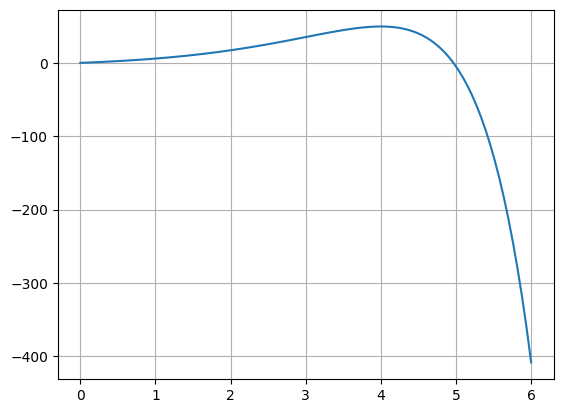

In [4]:
fig, ax = plt.subplots()
x = np.linspace(0, 6, 100)
ax.plot(x, f(x))
ax.grid()

This clearly has a root close to $x = 5$.

We'll find it via bisection

In [5]:
def bisect(xl, xr, func, tol=1.e-8):
    """find the zero of func(x) in the interval [xl, xr]"""

    # first check if there is a root in the interval
    fl = func(xl)
    fr = func(xr)

    if fl * fr > 0:
        print("no root in the interval")
        return None

    # now setup our iteration loop.  We will keep looping until
    # the relative error is < tol
    err = 1.e10
    xm = 0.5 * (xl + xr)

    while err > tol:
        fm = func(xm)

        if fl*fm > 0:
            # the root is in the right half of the interval
            xl = xm
            fl = fm
        else:
            # the root is in the left half of the interval
            xr = xm
            fr = fm

        xm = 0.5 * (xl + xr)
        err = np.abs(xr - xl) / np.abs(xm)

    return xm

In [6]:
x0 = bisect(1, 5, f)
x0

4.9651142209768295

Now we bring this back to physical units.  Note that:

$$\lambda T = \frac{hc}{k} \frac{1}{x}$$

In [7]:
k = 1.38e-23  # J /K
c = 3e8  # m/s
h = 6.63e-34  # m^2 kg/ s

print(h*c/k/x0)

0.0029028624190291573


This shows that

$$\lambda_\mathrm{max} T = 2.9~\times 10^{-3}\mbox{m K}$$